In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [73]:
df = pd.read_csv('./datasets/others/merge-date.csv', parse_dates=['date'])

In [74]:
df_subset = df[['date', 'PC4', 'so2']]

In [75]:
df_5611 = df_subset[df_subset["PC4"] == 5611]
df_5611 = df_5611[['date', 'so2']]

In [76]:
df_5611_per_4h = df_5611.groupby(pd.Grouper(key="date", freq="4H")).mean()

In [77]:
df_5611_per_4h.describe()

,so2
count,330.000000
mean,3.819898
std,3.169948
min,0.098555
25%,1.798010
50%,3.072012
75%,4.764296
max,20.018565


In [78]:
df_5611.describe()

,so2
count,1320.000000
mean,3.819898
std,3.328293
min,0.003351
25%,1.616325
50%,3.046487
75%,4.862328
max,23.344864


## Trend line

In [80]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)


X = make_lags(df_5611_per_4h, lags=4)
X = X.fillna(0.0)

In [101]:
lr = LinearRegression()

X = np.arange(len(df_5611.index)).reshape(-1, 1) 
y = df_5611['so2']

model = lr.fit(X, y)

y_pred = model.predict(X)
y_pred = pd.Series(model.predict(X), index=np.arange(len(df_5611.index)))


Text(0, 0.5, 'Quantity of SO2 μg/m3')

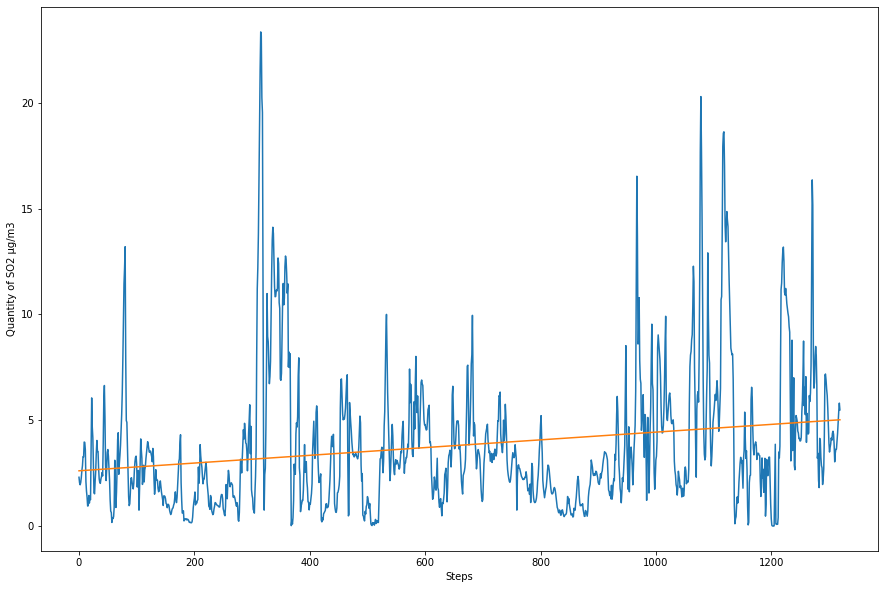

In [105]:
fig, ax = plt.subplots(figsize=(15, 10))

y.plot(ax=ax)
y_pred.plot(ax=ax)

ax.set_xlabel("Steps")
ax.set_ylabel("Quantity of SO2 μg/m3")

## Trainning